In [ ]:
from google.colab import drive

In [ ]:
drive.mount('\content\drive')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread('/content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/ak01.jpg')
plt.imshow(img)

In [ ]:
img1 = plt.imread('/content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/ak01.jpg')
plt.imshow(img1)

In [ ]:
import glob
gen = [glob.glob('/content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/*.*')]

forg = [glob.glob('/content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/*.*')]

In [ ]:

# Print loaded image file paths
for data_idx, data_paths in enumerate(gen):
    for path in data_paths:
        print(f"Gen-{data_idx + 1} image path: {path}")

for data_idx, data_paths in enumerate(forg):
    for path in data_paths:
        print(f"Forg-{data_idx + 1} image path: {path}")

Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/ak01.jpg
Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/ml02.jpg
Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/lk03.jpg
Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/ch04.jpg
Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/nn05.jpg
Gen-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/orginal_sig/an06.jpg
Forg-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/ak01.jpg
Forg-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/an06.jpg
Forg-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/ch04.jpg
Forg-1 image path: /content/contentdrive/MyDrive/handwritten_signature/dataset2/forg_sig/lk03.jpg
Forg-1 i

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog

train_data = []
train_labels = []

test_data = []
test_labels = []

orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

for data in range(len(gen)):
    for i in gen[data]:
        image = cv2.imread(i)
        if image is None:
            print(f"Error loading image: {i}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        hog_features = hog(
            gray_image,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block
        )

        if data == 3:
            test_data.append(image)
            test_labels.append(0)
        else:
            train_data.append(hog_features)
            train_labels.append(0)

for data in range(len(forg)):
    for j in forg[data]:
        image = cv2.imread(j)
        if image is None:
            print(f"Error loading image: {j}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        hog_features = hog(
            gray_image,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block
        )

        if data == 3:
            test_data.append(image)
            test_labels.append(1)
        else:
            train_data.append(hog_features)
            train_labels.append(1)

train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
train_data.shape

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [ ]:
pip install keras_preprocessing

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam
from keras.optimizers import RMSprop

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def objective(x, y):
 return x**2.0 + y**2.0


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))

network.add(Flatten()) #NX1
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3)) #143
network.add(Flatten()) #NX1
network.add(Dense(2,activation = 'softmax'))
network.add(Flatten()) #NX1

network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

callbacks = [earlyStopping, reduceLROnPlateau]

# Create a simple Dense model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(26244,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
EPOCHS = 3
BS = 1
progress = model.fit(train_data, train_labels, batch_size=BS, epochs=EPOCHS, callbacks=callbacks, validation_split=0.05)

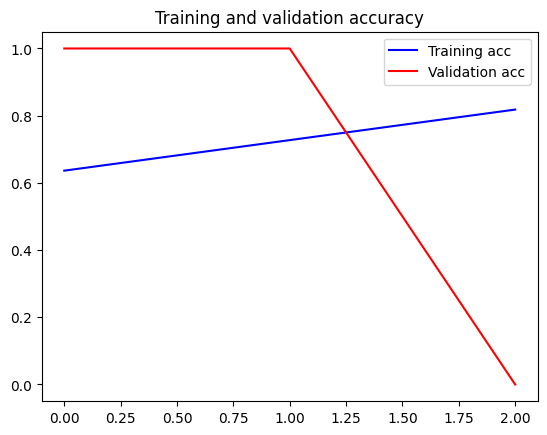

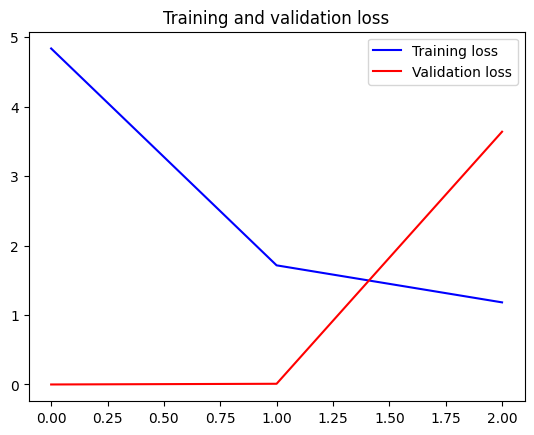

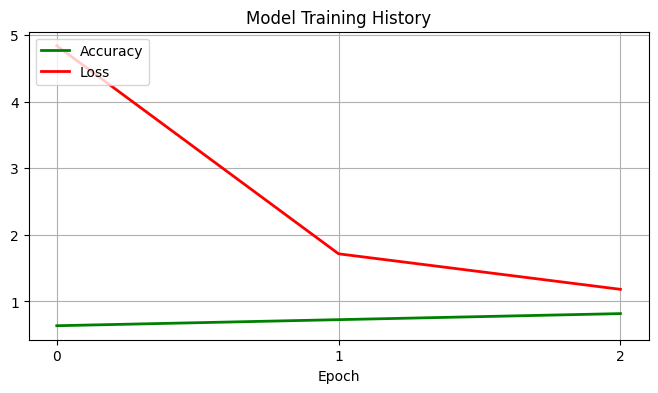

In [ ]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


import matplotlib.pyplot as plt

# Assuming 'progress' is your model training history dictionary
acc = progress.history['accuracy']
loss = progress.history['loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(epochs, acc, 'g-', linewidth=2, label='Accuracy')
plt.plot(epochs, loss, 'r-', linewidth=2, label='Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.legend(loc='upper left')
plt.show()

In [ ]:
pred = network.predict(test_data)
pred



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np

# ... Load and preprocess data ...

# Train and evaluate the CNN-only model
cnn_model = Sequential()
# ... Define CNN layers ...
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_data, train_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.05)
cnn_pred_probs = cnn_model.predict(test_data)
cnn_pred_labels = np.argmax(cnn_pred_probs, axis=1)
# Calculate evaluation metrics for CNN-only model
cnn_accuracy = accuracy_score(test_labels, cnn_pred_labels)
# ... Calculate other metrics ...

# Train and evaluate the HOG-only model
hog_model = Sequential()
# ... Define HOG-only model layers ...
hog_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hog_model.fit(train_data, train_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.05)
hog_pred_labels = hog_model.predict_classes(test_data)
# Calculate evaluation metrics for HOG-only model
hog_accuracy = accuracy_score(test_labels, hog_pred_labels)
# ... Calculate other metrics ...

# Train and evaluate the CNN+HOG model
combined_model = Sequential()
# ... Define CNN and HOG combined model layers ...
combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
combined_model.fit(train_data_combined, train_labels, batch_size=BS, epochs=EPOCHS, validation_split=0.05)
combined_pred_labels = combined_model.predict_classes(test_data_combined)
# Calculate evaluation metrics for CNN+HOG model
combined_accuracy = accuracy_score(test_labels, combined_pred_labels)
# ... Calculate other metrics ...

# Print evaluation results
print("CNN-only Accuracy:", cnn_accuracy)
# ... Print other metrics for CNN-only model ...
print("HOG-only Accuracy:", hog_accuracy)
# ... Print other metrics for HOG-only model ...
print("CNN+HOG Accuracy:", combined_accuracy)
# ... Print other metrics for CNN+HOG model ...

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Get predicted probabilities for each class from the network model
pred_probs = network.predict(test_data)

# Convert probabilities to predicted labels (0 or 1)
pred_labels = np.argmax(pred_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, pred_labels)
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
